In [15]:
import os
import json

from spacy.lang.de import German

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
#Visualisierung
import pyLDAvis.gensim_models
import pyLDAvis

import pandas as pd
import seaborn as sns

from collections import Counter

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
folder = os.path.join('data','REFINED','ndr')

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
parser = German()

def tokenize(text): 
    # tokenize
    tokens = []
    t = parser(text)
    for token in t:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            tokens.append('URL')
        else:
            tokens.append(token.lower_)
    return tokens


def lemmatize(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def return_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('german'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop]
    tokens = [lemmatize(token) for token in tokens]
    return tokens

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def iteratefiles(filepath):
    list_dir = os.listdir(filepath)
    data = []
    for item in list_dir:
        with open(os.path.join(folder,item),"r",encoding='utf-8') as f:
            res = f.read() 
        dict = json.loads(res)
        content = dict['content'].values()
        c = ''
        for l in content: 
            c += l[1]
        content = c
        tokens = prepare_text_for_lda(content)
        data.append(tokens)
    return data, list_dir
    

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
data, list_dir = iteratefiles(folder)

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Normales LDA
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(token) for token in data]
num_topics = 50
'''
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=num_topics,id2word=dictionary,passes=15)
ldamodel.save('model5.gensim')

for idx, topic in ldamodel.print_topics(-1,num_words=20):
    print('Topic: {} \nWords: {}'.format(idx, topic))
'''    

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=num_topics,id2word=dictionary,passes=15)\nldamodel.save('model5.gensim')\n\nfor idx, topic in ldamodel.print_topics(-1,num_words=20):\n    print('Topic: {} \nWords: {}'.format(idx, topic))\n"

In [21]:
# TF-IDF und LDA
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

ldamodel_tfidf = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=num_topics,id2word=dictionary,passes=15)
ldamodel_tfidf.save('model6.gensim')

for idx, topic in ldamodel_tfidf.print_topics(-1,num_words=10):
    print('Topic: {} \nWords: {}'.format(idx, topic))

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\gensim\models\ldamodel.py:849: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


Topic: 0 
Words: 0.000*"mutante" + 0.000*"b-zellen" + 0.000*"endothel" + 0.000*"proteom" + 0.000*"blutgerinnung" + 0.000*"selektiert" + 0.000*"sterblichkeitsrisiko" + 0.000*"sinusvenenthrombosen" + 0.000*"antibabypille" + 0.000*"thrombosen"
Topic: 1 
Words: 0.000*"sarscov2" + 0.000*"normalflora" + 0.000*"ctwert" + 0.000*"abstrich" + 0.000*"seife" + 0.000*"hülle" + 0.000*"serum" + 0.000*"antikörper" + 0.000*"objektträger" + 0.000*"speichel"
Topic: 2 
Words: 0.001*"autophagie" + 0.001*"chloroquin" + 0.000*"niclosamid" + 0.000*"superspreading" + 0.000*"dispersionsfaktor" + 0.000*"superspreading-events" + 0.000*"dispersion" + 0.000*"kontrollmaßnahme" + 0.000*"streuparameter" + 0.000*"cluster"
Topic: 3 
Words: 0.000*"atemschutzmasken" + 0.000*"attack" + 0.000*"türklinke" + 0.000*"laborverbünde" + 0.000*"oberflächen" + 0.000*"meter" + 0.000*"basenpaare" + 0.000*"italien" + 0.000*"oberfläche" + 0.000*"stunden"
Topic: 4 
Words: 0.000*"behandelten" + 0.000*"chloroquin" + 0.000*"substanz" + 0.00

Gütekriterien schaffen:
The LDA model (lda_model) we have created above can be used to compute the model’s perplexity, i.e. how good the model is. The lower the score the better the model will be. It can be done with the help of following script

In [22]:

print('\nPerplexity: ', ldamodel_tfidf.log_perplexity(corpus))

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -56.08598499378881


The LDA model (lda_model) we have created above can be used to compute the model’s coherence score i.e. the average /median of the pairwise word-similarity scores of the words in the topic. It can be done with the help of following script
https://radimrehurek.com/gensim_3.8.3/models/coherencemodel.html

In [23]:
coherence_model_lda = CoherenceModel(
   model=ldamodel_tfidf, corpus=corpus_tfidf,texts=data, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.44372188496098836


In [24]:
'''
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
# pyLDAvis.save_html(vis)
vis
'''

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n# Visualize the topics\npyLDAvis.enable_notebook()\nvis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)\n# pyLDAvis.save_html(vis)\nvis\n'

In [25]:
vis_tfidf = pyLDAvis.gensim_models.prepare(ldamodel_tfidf, corpus_tfidf, dictionary)
# pyLDAvis.save_html(vis_tfidf,os.path.join("data","STATS","vis.html"))
vis_tfidf

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
33     0.010827 -0.000040       1        1  16.451004
2     -0.000958  0.000714       2        1   2.683905
8     -0.000529  0.000123       3        1   2.441236
32    -0.000533  0.000124       4        1   2.408876
24    -0.000499  0.000109       5        1   2.376433
40    -0.000462  0.000195       6        1   2.332973
19    -0.000493  0.000108       7        1   2.106868
1     -0.000318  0.000046       8        1   2.010740
22    -0.000554  0.000239       9        1   1.971434
42    -0.000412  0.000077      10        1   1.947310
11    -0.000272  0.000058      11        1   1.945470
14    -0.000423  0.000081      12        1   1.898363
37    -0.000431  0.000083      13        1   1.879887
12    -0.000408  0.000075      14        1   1.878758
35    -0.000290  0.000046      15        1   1.870652
43    -0.000264  0.000028      16        1   1.8545

In [78]:
def topic_relevance_per_doc(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list  
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = topic_relevance_per_doc(ldamodel=ldamodel_tfidf, corpus=corpus_tfidf, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.to_csv(os.path.join("data","STATS","dominant_topics.csv"))

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
[(0, 0.02), (1, 0.02), (2, 0.02), (3, 0.02), (4, 0.02), (5, 0.02), (6, 0.02), (7, 0.02), (8, 0.02), (9, 0.02), (10, 0.02), (11, 0.02), (12, 0.02), (13, 0.02), (14, 0.02), (15, 0.02), (16, 0.02), (17, 0.02), (18, 0.02), (19, 0.02), (20, 0.02), (21, 0.02), (22, 0.02), (23, 0.02), (24, 0.02), (25, 0.02), (26, 0.02), (27, 0.02), (28, 0.02), (29, 0.02), (30, 0.02), (31, 0.02), (32, 0.02), (33, 0.02), (34, 0.02), (35, 0.02), (36, 0.02), (37, 0.02), (38, 0.02), (39, 0.02), (40, 0.02), (41, 0.02), (42, 0.02), (43, 0.02), (44, 0.02), (45, 0.02), (46, 0.02), (47, 0.02), (48, 0.02), (49, 0.02)]
1
[(0, 0.02), (1, 0.02), (2, 0.02), (3, 0.02), (4, 0.02), (5, 0.02), (6, 0.02), (7, 0.02), (8, 0.02), (9, 0.02), (10, 0.02), (11, 0.02), (12, 0.02), (13, 0.02), (14, 0.02), (15, 0.02), (16, 0.02), (17, 0.02), (18, 0.02), (19, 0.02), (20, 0.02), (21, 0.02), (22, 0.02), (23, 0.02), (24, 0.02), (25, 0.02), (26, 0.02), (27, 0.02), (28, 0.02), (29, 0.02), (30, 0.02), (31, 0.02), (32, 0.02), (33, 0.02), (34, 0

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1883, 1416, 1396, 1563, 1385, 1390, 2150, 2209, 2045, 1614, 1817, 1591, 1732, 2323, 2280, 1552, 171, 1705, 2172, 1508, 1651, 267, 1722, 2123, 2435, 2259, 2345, 2457, 2263, 2383, 1949, 2244, 2746, 1493, 2946, 2648, 2419, 2840, 3026, 2032, 2819, 2676, 2424, 3044, 1523, 2647, 5374, 2695, 3903, 4023, 3721, 3913, 1599, 3266, 3399, 4371, 4723, 4263, 4856, 4694, 3933, 6455, 4646, 1759, 6284, 5367, 4074, 5112, 4849, 4552, 5354, 4544, 4982, 4378, 1761, 5223, 4309, 3240, 4692, 5565, 3767, 5736, 5332, 5236, 4150, 1524, 3524, 5801]


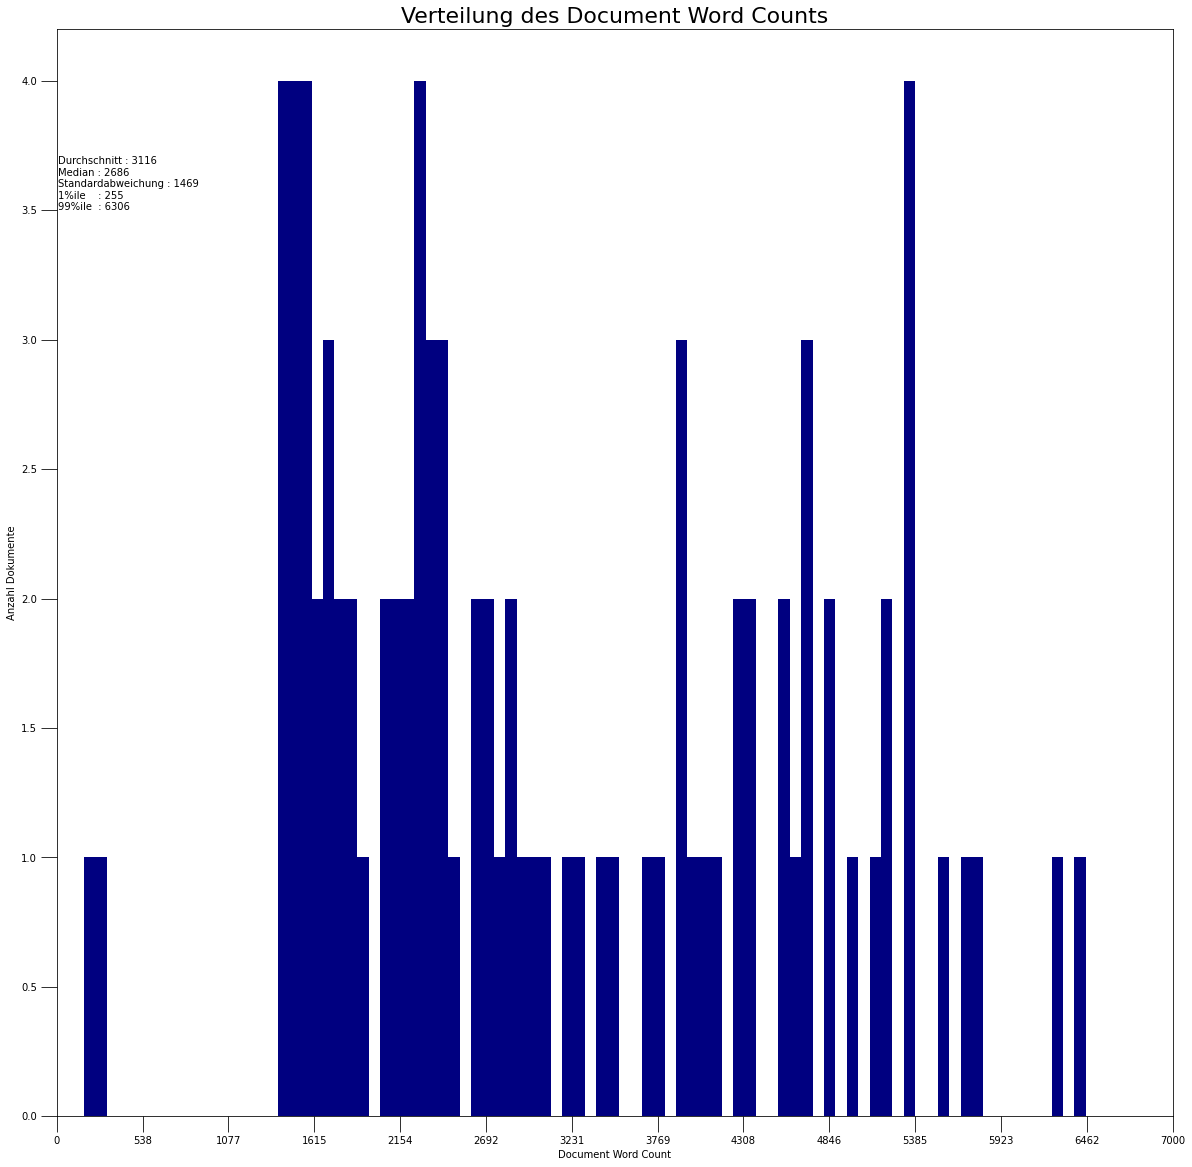

In [79]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
print(doc_lens)
bins = len(list_dir)
# Plot
plt.figure(figsize=(20,20))
plt.hist(doc_lens, bins = bins, color='navy')
plt.text(10,3.5,"Durchschnitt : "+str(round(np.mean(doc_lens)))+"\nMedian : "+str(round(np.median(doc_lens)))+"\nStandardabweichung : "+str(round(np.std(doc_lens)))+"\n1%ile    : "+str(round(np.quantile(doc_lens, q=0.01)))+"\n99%ile  : "+str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 50), ylabel='Anzahl Dokumente', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,7000,14))
plt.title('Verteilung des Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


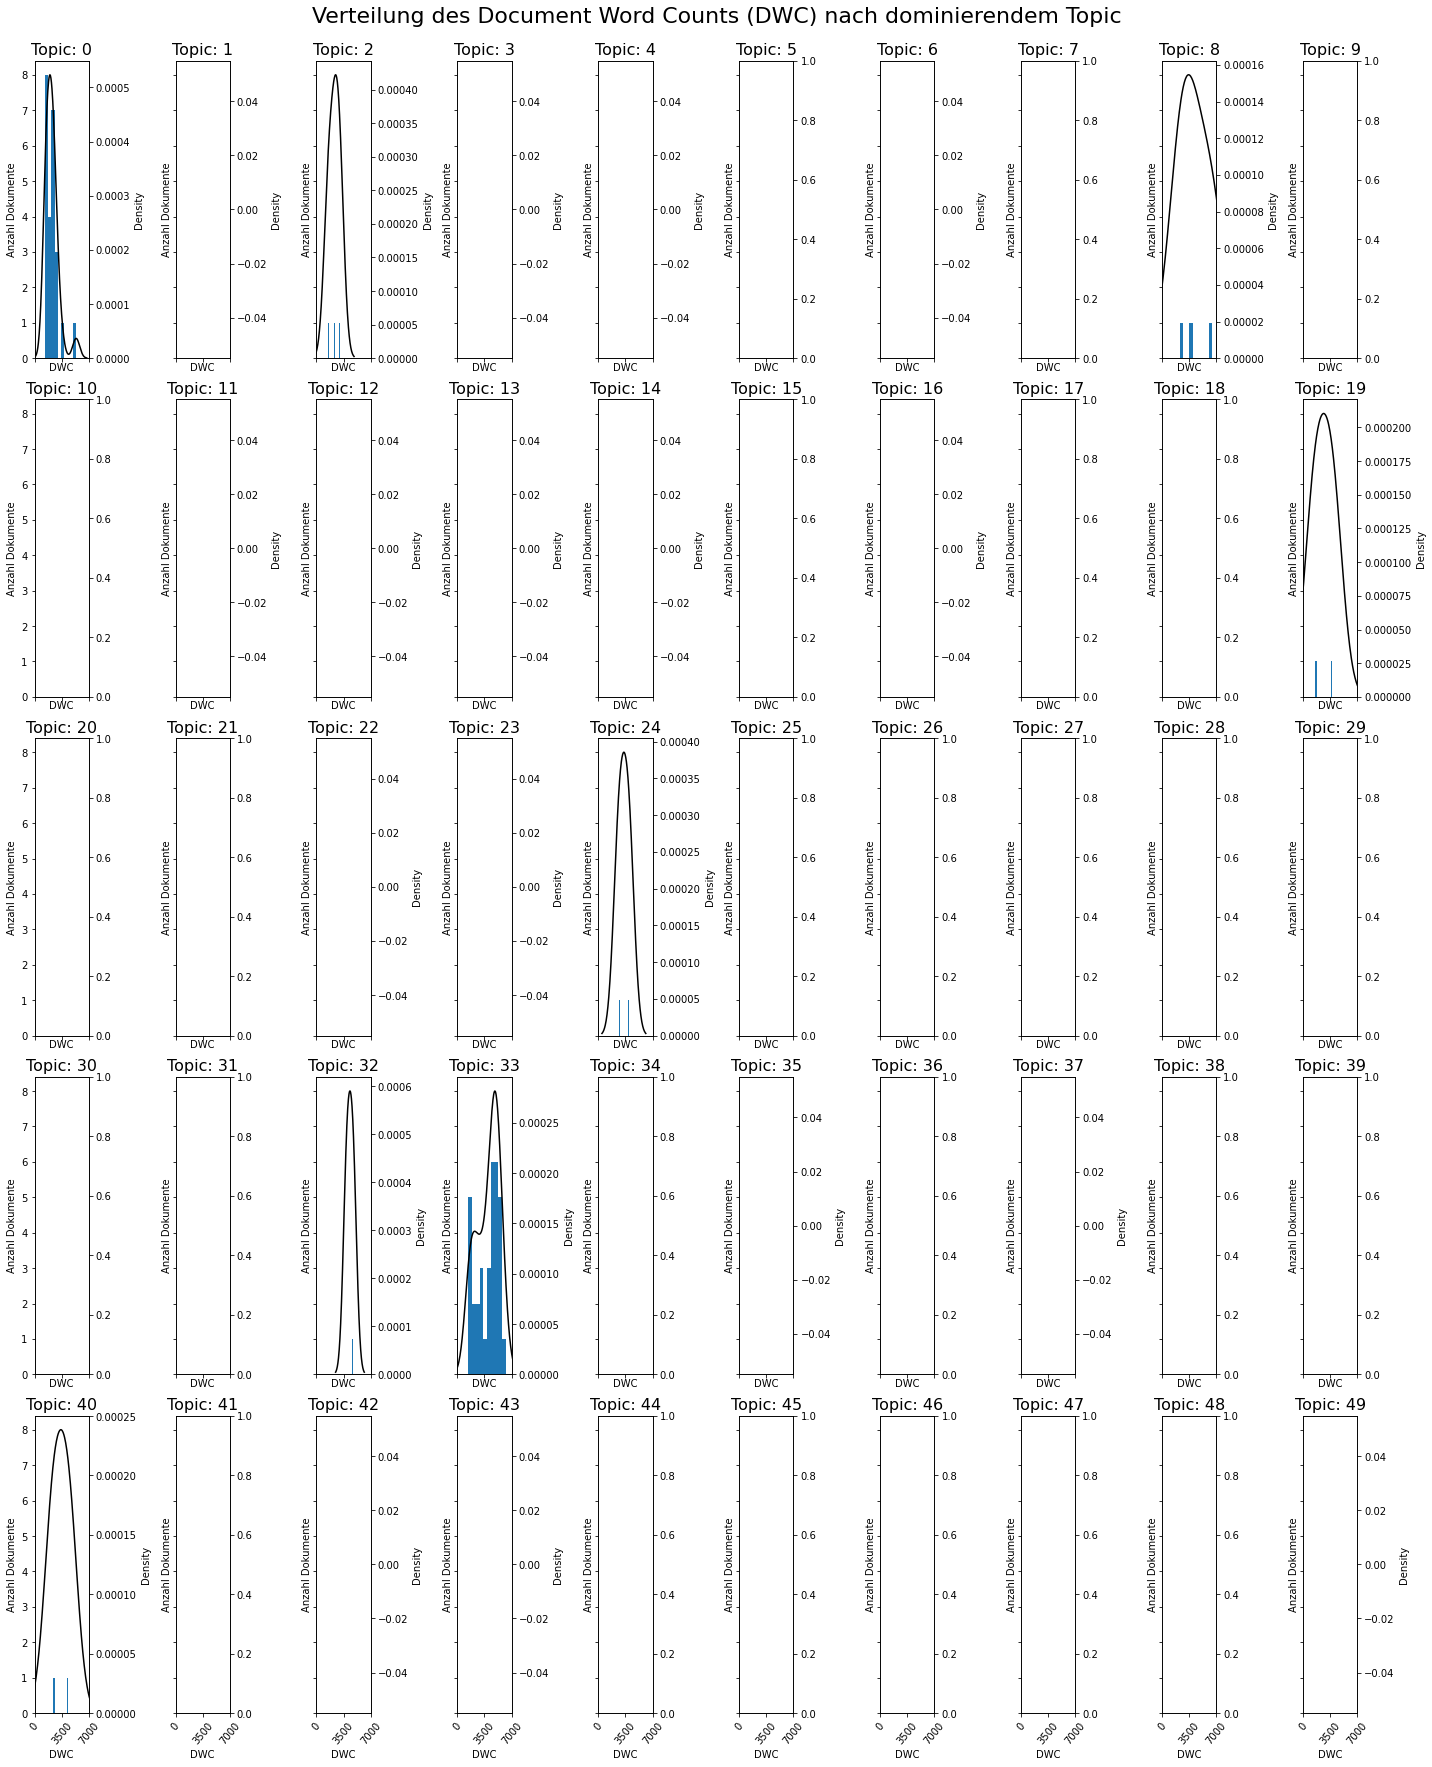

In [80]:
fig, axes = plt.subplots(5,10,figsize=(20,25), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 10) 
    ax.tick_params(axis='y')
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx(),warn_singular=False)
    ax.set(xlim=(0, 7000), xlabel='DWC')
    ax.set_ylabel('Anzahl Dokumente')
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16))
    ax.tick_params(axis="x",rotation=50)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.xticks(np.linspace(0,7000,3))
fig.suptitle('Verteilung des Document Word Counts (DWC) nach dominierendem Topic', fontsize=22)
plt.show()

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


               word  topic_id  importance  word_count
0           mutante         0    0.000032         146
1          b-zellen         0    0.000032          34
2          endothel         0    0.000032           9
3           proteom         0    0.000032           5
4     blutgerinnung         0    0.000032          13
..              ...       ...         ...         ...
495      nachsuchen        49    0.000219           1
496           fülle        49    0.000219           1
497           altbe        49    0.000219           1
498  selbstverständ        49    0.000219           1
499     immunsignal        49    0.000219           1

[500 rows x 4 columns]


<ipython-input-82-6baea0d75b74>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


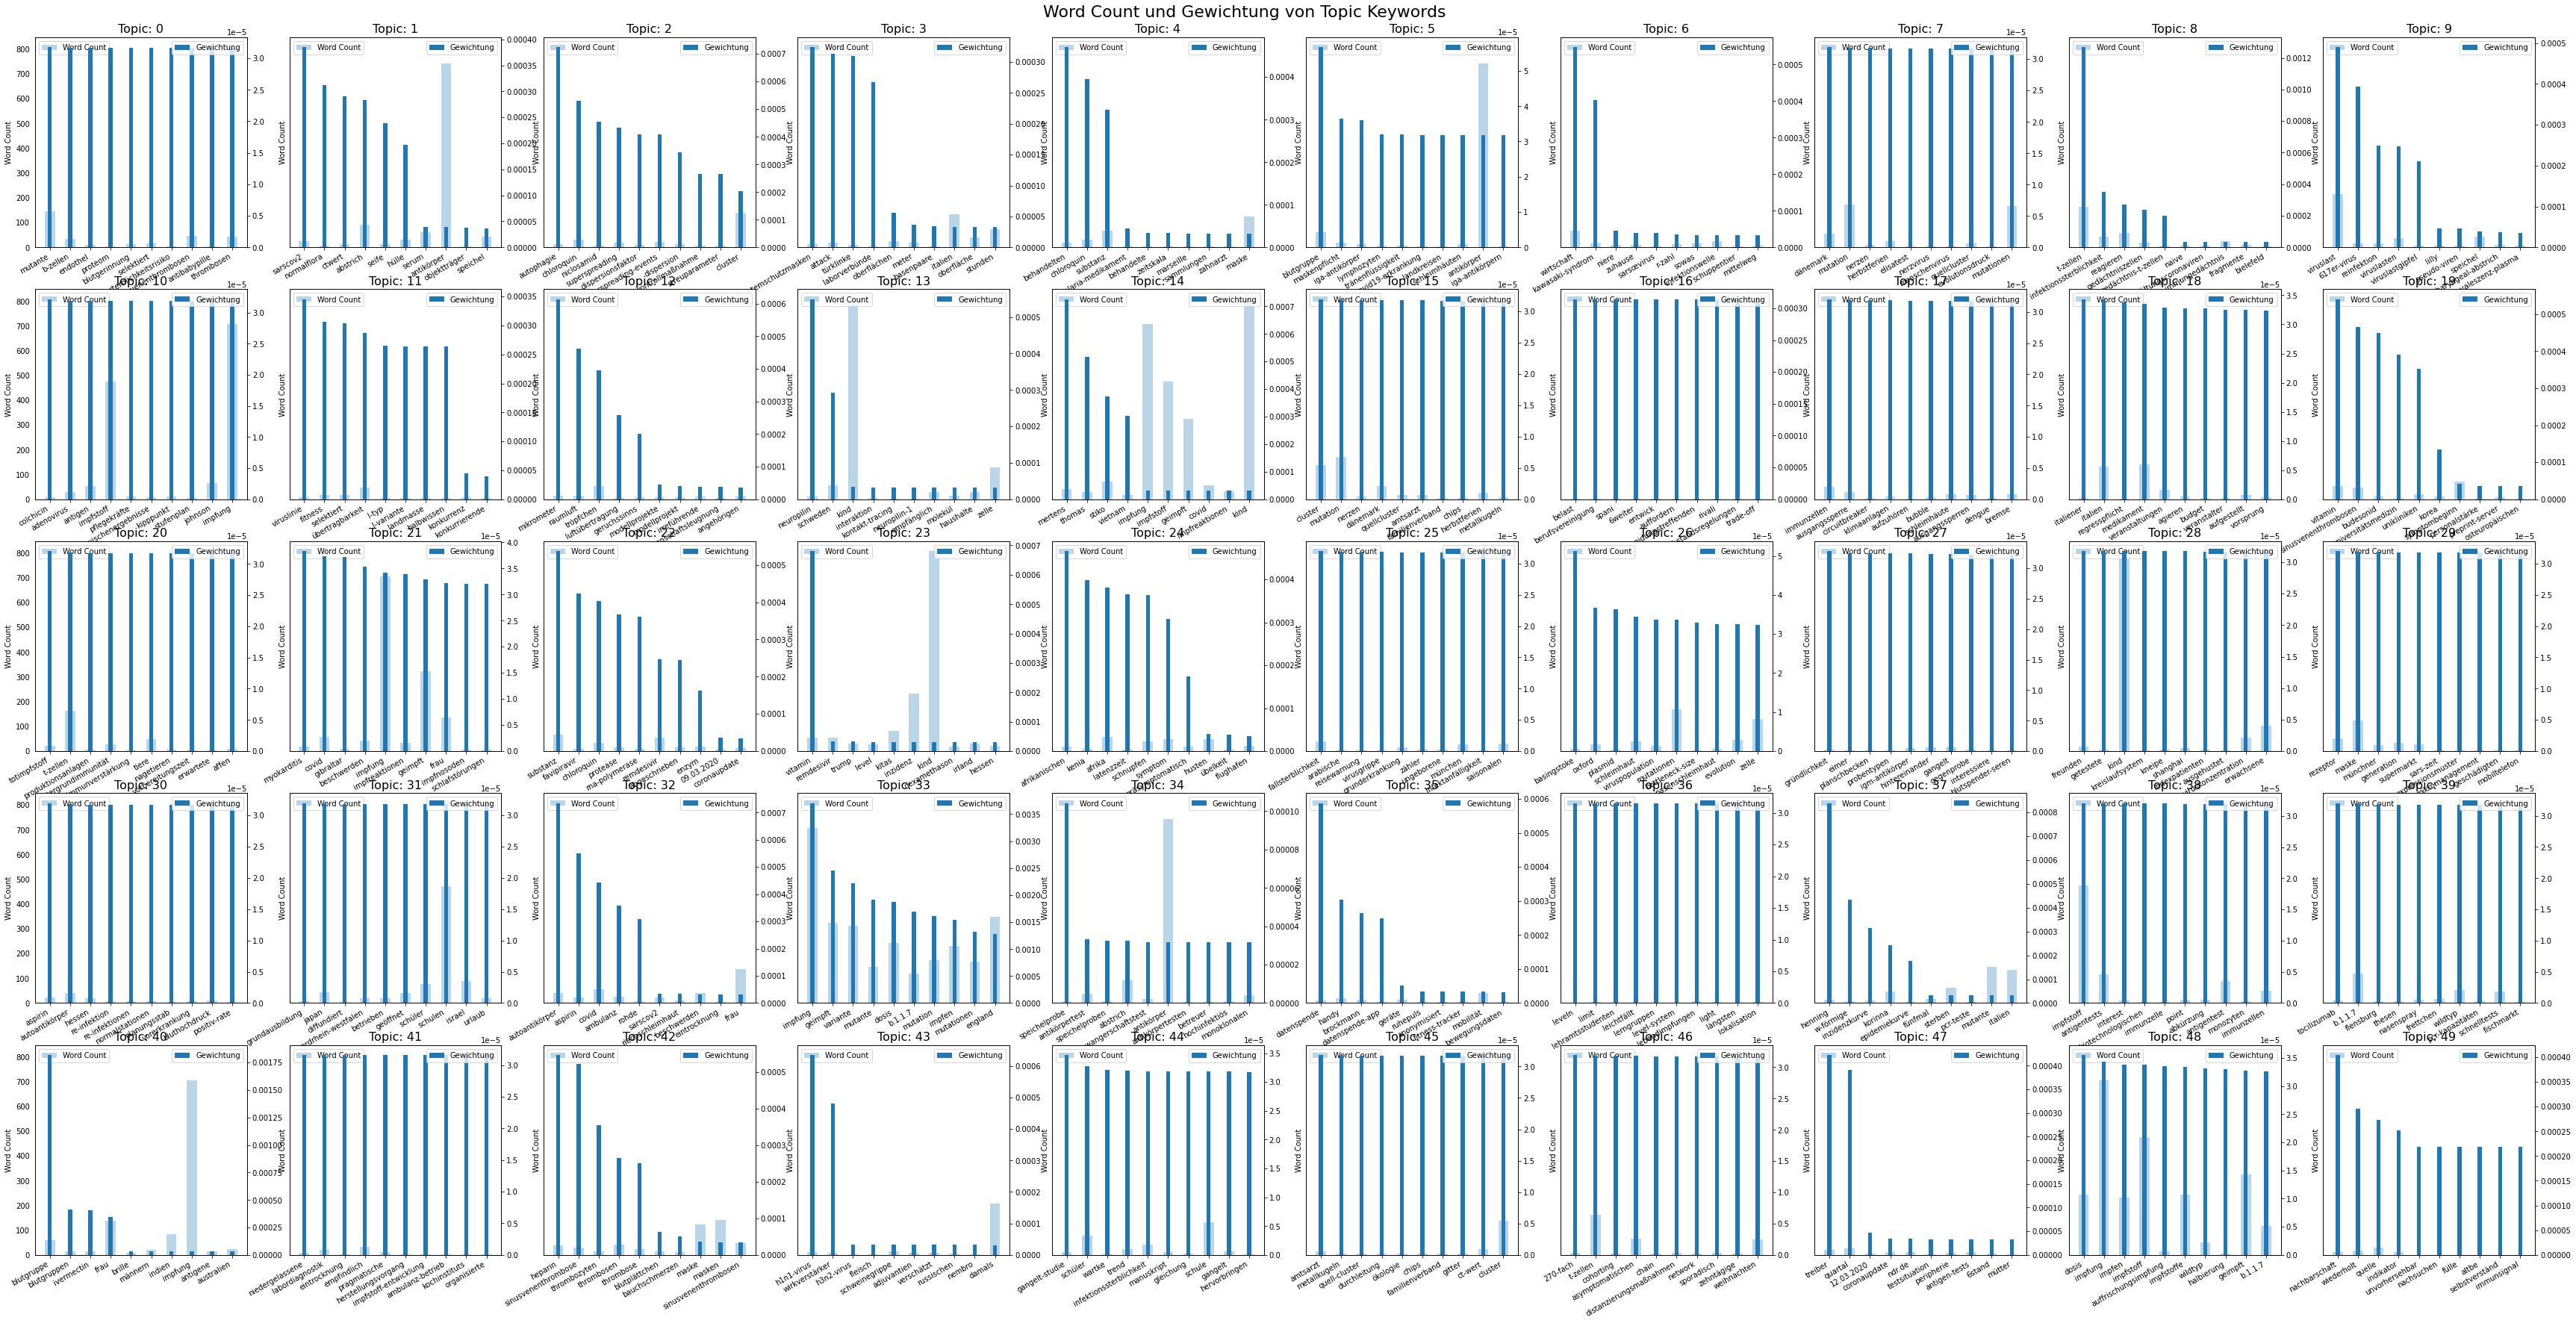

In [82]:
topics = ldamodel_tfidf.show_topics(formatted=False,num_topics=100)
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
print(df)

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5,10, figsize=(60,30), sharey=True)
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Gewichtung')
    ax.set_ylabel('Word Count')
    # ax_twin.set_ylim(0, 4.0); 
    # ax.set_ylim(0, 50)
    ax.set_title('Topic: ' + str(i), fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
  
fig.suptitle('Word Count und Gewichtung von Topic Keywords', fontsize=22,y=0.9)    
plt.show()

In [58]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp] #, wordid_topics, wordid_phivalues
        # print(model[corp])
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return dominant_topics, topic_percentages

dominant_topics, topic_percentages = topics_per_document(model=ldamodel_tfidf, corpus=corpus, end=-1)            
# print(dominant_topics)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel_tfidf.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\teres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


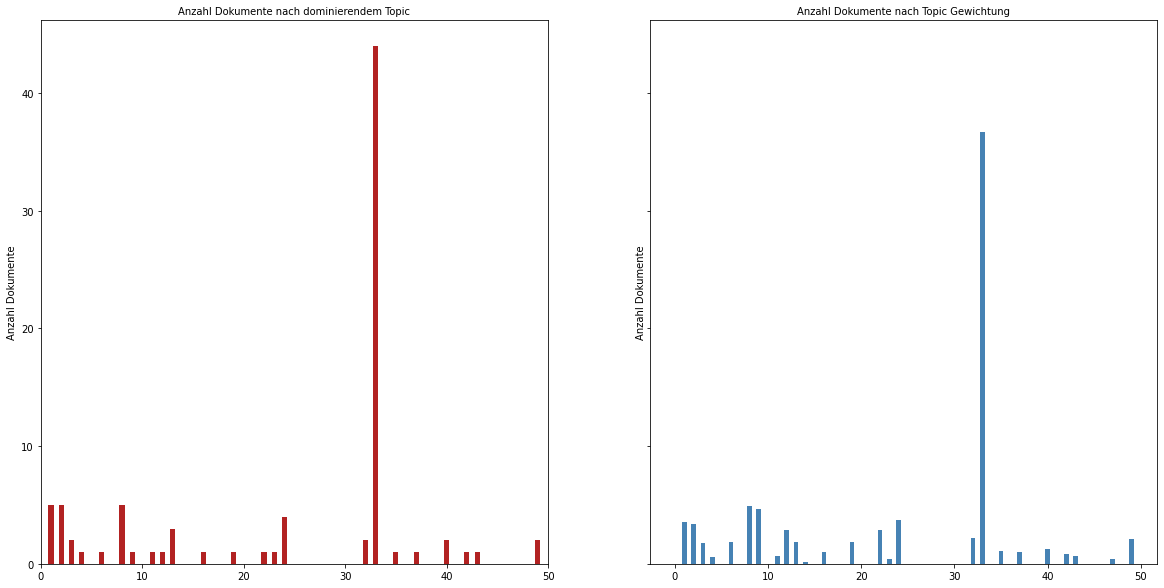

In [86]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_title('Anzahl Dokumente nach dominierendem Topic', fontdict=dict(size=10))
ax1.set_ylabel('Anzahl Dokumente')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_title('Anzahl Dokumente nach Topic Gewichtung', fontdict=dict(size=10))
ax2.set_ylabel('Anzahl Dokumente')

plt.show()